<a href="https://colab.research.google.com/github/alyafi0899/C22-PS174-Machine-Learning/blob/main/bangkit_predict2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy 
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
 
# load the dataset
dataframe = read_csv('sales_forcasting.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# create and fit Multilayer Perceptron model
model = Sequential()


model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_dim=look_back, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1),
])

# Print the model summary
model_baseline.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_baseline.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history = model_baseline.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2,)

Epoch 1/400
46/46 - 1s - loss: 2151.4880 - accuracy: 0.0000e+00 - 705ms/epoch - 15ms/step
Epoch 2/400
46/46 - 0s - loss: 1120.2290 - accuracy: 0.0000e+00 - 56ms/epoch - 1ms/step
Epoch 3/400
46/46 - 0s - loss: 1174.1162 - accuracy: 0.0000e+00 - 54ms/epoch - 1ms/step
Epoch 4/400
46/46 - 0s - loss: 1165.0254 - accuracy: 0.0000e+00 - 63ms/epoch - 1ms/step
Epoch 5/400
46/46 - 0s - loss: 1072.6718 - accuracy: 0.0000e+00 - 62ms/epoch - 1ms/step
Epoch 6/400
46/46 - 0s - loss: 1006.5042 - accuracy: 0.0000e+00 - 55ms/epoch - 1ms/step
Epoch 7/400
46/46 - 0s - loss: 961.3628 - accuracy: 0.0000e+00 - 58ms/epoch - 1ms/step
Epoch 8/400
46/46 - 0s - loss: 956.9328 - accuracy: 0.0000e+00 - 73ms/epoch - 2ms/step
Epoch 9/400
46/46 - 0s - loss: 944.5527 - accuracy: 0.0000e+00 - 61ms/epoch - 1ms/step
Epoch 10/400
46/46 - 0s - loss: 916.4757 - accuracy: 0.0000e+00 - 62ms/epoch - 1ms/step
Epoch 11/400
46/46 - 0s - loss: 921.6680 - accuracy: 0.0000e+00 - 72ms/epoch - 2ms/step
Epoch 12/400
46/46 - 0s - loss: 8

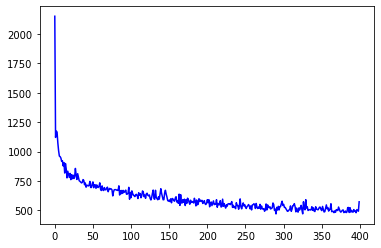

In [ ]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

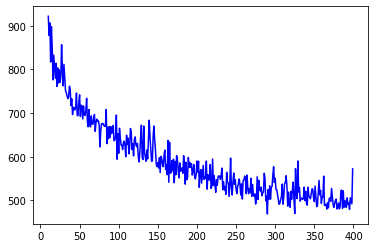

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to average
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(trainX, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_dim=look_back, activation='relu'),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [ ]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

In [ ]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2,)

Epoch 1/400
46/46 - 0s - loss: 50521.0312 - 341ms/epoch - 7ms/step
Epoch 2/400
46/46 - 0s - loss: 50766.9062 - 61ms/epoch - 1ms/step
Epoch 3/400
46/46 - 0s - loss: 48687.5312 - 68ms/epoch - 1ms/step
Epoch 4/400
46/46 - 0s - loss: 42924.2109 - 56ms/epoch - 1ms/step
Epoch 5/400
46/46 - 0s - loss: 28455.3633 - 59ms/epoch - 1ms/step
Epoch 6/400
46/46 - 0s - loss: 11239.5098 - 59ms/epoch - 1ms/step
Epoch 7/400
46/46 - 0s - loss: 5330.8872 - 57ms/epoch - 1ms/step
Epoch 8/400
46/46 - 0s - loss: 4996.0088 - 70ms/epoch - 2ms/step
Epoch 9/400
46/46 - 0s - loss: 4982.2515 - 55ms/epoch - 1ms/step
Epoch 10/400
46/46 - 0s - loss: 5001.7192 - 62ms/epoch - 1ms/step
Epoch 11/400
46/46 - 0s - loss: 5007.8804 - 82ms/epoch - 2ms/step
Epoch 12/400
46/46 - 0s - loss: 5040.4702 - 71ms/epoch - 2ms/step
Epoch 13/400
46/46 - 0s - loss: 5014.8643 - 55ms/epoch - 1ms/step
Epoch 14/400
46/46 - 0s - loss: 5004.0596 - 54ms/epoch - 1ms/step
Epoch 15/400
46/46 - 0s - loss: 5051.1338 - 73ms/epoch - 2ms/step
Epoch 16/400

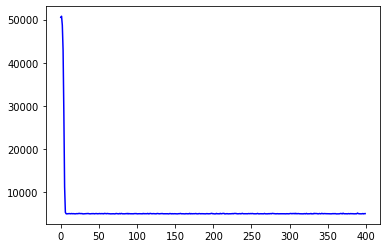

In [ ]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

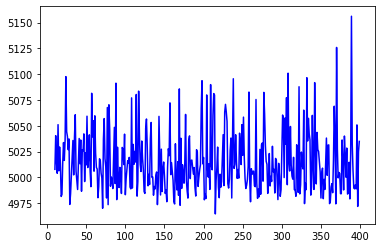

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = trainY
x_train = trainX

# Get the validation set
time_valid = testY
x_valid = testX

### **Convert tflite**

In [ ]:
# Export directory
export_dir = 'saved_model/1'

# Use the tf.saved_model API to save your model in the SavedModel format
tf.saved_model.save(model, export_dir = export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

528